In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize as opt

def v(x): #LJ potential
    return 4*(1/x**12 - 1/x**6)

# dimensionless function which is to be integrated, abs value to avoid negative sqrt issues due to approximations
def action_fx(x, en):
    return np.sqrt(abs(en - v(x)))

# fn to implement the root finding to obtainn CTP values.
def vx_root(x, en):
    return en-v(x)

# fn to return the nth energy level, and the turning points to be used for the graph
def return_energy_Nthlevel(E_guess, n, gamma, ):
    # n = 0
    # E_guess = -1.0
    # gamma = 100

    error_prev, error = 100, 100
    energy_matrix = []

    while True:
        energy_matrix.append(round(E_guess,3))
        
        # implementation of root finding for ctp values, for n=0 level
        ctp_left = opt.newton(vx_root, x0=1.0, fprime=None, args=(E_guess, ))
        ctp_right = opt.newton(vx_root, x0=1.25, fprime=None, args=(E_guess,))
        # CTP calculation CORRECT 

        # calculation of the action integral
        integral_result, e = integrate.quad(action_fx, ctp_left, ctp_right, args=(E_guess, ))
        integral_result = gamma*integral_result
            
        wkb_quant = (n+1/2)*np.pi
            
        error_prev = error
        error = integral_result - wkb_quant
            
        if (abs(error) > abs(error_prev)):
            break
        else:
            E_guess += 0.01
    return energy_matrix[-2]

en = return_energy_Nthlevel(E_guess = -1.0, n = 10, gamma=100)
en

-0.24

Text(0.5, 1.0, 'First 10 energy levels in Molecular Potential')

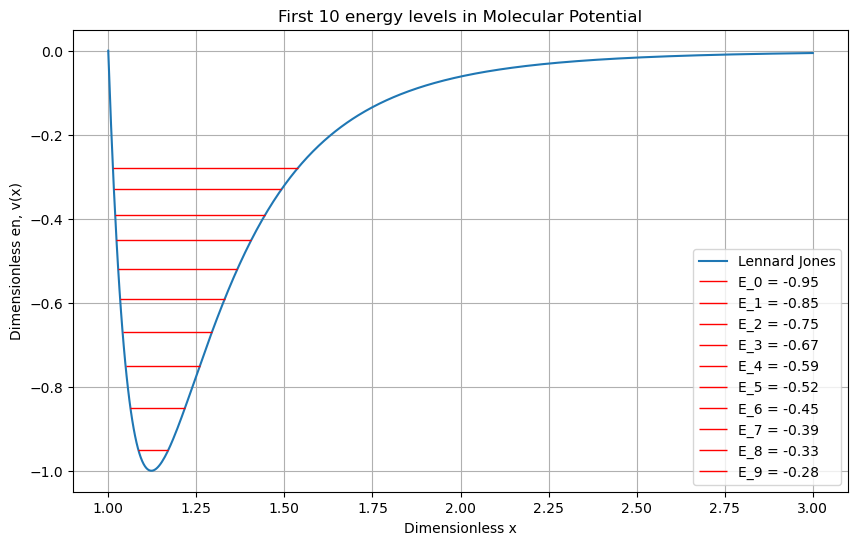

In [101]:
x = np.linspace(1,3.0, 500)
plt.figure(figsize=(10, 6))
plt.plot(x, v(x), label="Lennard Jones")


plt.grid()
plt.legend()

for N in range(10): # first 10 energy levels
    en = return_energy_Nthlevel(E_guess = -1.0, n = N, gamma=100)
    ctp_a = opt.newton(vx_root, x0=1.0, fprime=None, args=(en, ))
    ctp_b = opt.newton(vx_root, x0=1.25, fprime=None, args=(en, ))
    
    plt.hlines(y=en, xmin=ctp_a, xmax=ctp_b, color='r', linestyle='-', linewidth=1, label=f'E_{N} = {en}')
    
plt.grid(True)
plt.legend()
plt.xlabel("Dimensionless x")
plt.ylabel("Dimensionless en, v(x)")
plt.title("First 10 energy levels in Molecular Potential")